In [151]:
import numpy as np
import pandas as pd
import talib
from datetime import datetime
from binance.client import Client

In [152]:
client = Client('','')
start_str = 'Nov 1 2022'
end_str = 'May 1 2024'
coin ='XRP'
klines = client.get_historical_klines(symbol=f'{coin}USDT', interval=client.KLINE_INTERVAL_4HOUR, start_str=start_str,end_str=end_str)
df = pd.DataFrame(klines)
df = df.iloc[:,:6]
df.columns = ['time','open','high','low','close','volume']
df = df.astype(float)
df['time'] = [datetime.fromtimestamp(ts / 1000) for ts in df['time']]
df1  = df

In [153]:
open = df['open']
high = df['high']
low  = df['low']
close = df['close']
volume = df['volume']
df.dropna()
avg = (df['high'] + df['low']) / 2


df['BBANDS_upperband'], df['BBANDS_middleband'], df['BBANDS_lowerband'] = talib.BBANDS(close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
df['BBANDS_upperband'] = (df['BBANDS_upperband'] - avg) / close
df['BBANDS_middleband'] = (df['BBANDS_middleband'] - avg) / close
df['BBANDS_lowerband'] = (df['BBANDS_lowerband'] - avg) / close
df['DEMA'] = (talib.DEMA(close, timeperiod=30) - avg) / close
df['EMA'] = (talib.EMA(close, timeperiod=30) - avg) / close
df['HT_TRENDLINE'] = (talib.HT_TRENDLINE(close) - avg) / close
df['KAMA'] = (talib.KAMA(close, timeperiod=30) - avg) / close
df['MA'] = (talib.MA(close, timeperiod=30, matype=0) - avg) / close
df['MIDPOINT'] = (talib.MIDPOINT(close, timeperiod=14) - avg) / close
df['SMA'] = (talib.SMA(close, timeperiod=30) - avg) / close
df['T3'] = (talib.T3(close, timeperiod=5, vfactor=0) - avg) / close
df['TEMA'] = (talib.TEMA(close, timeperiod=30) - avg) / close
df['TRIMA'] = (talib.TRIMA(close, timeperiod=30) - avg) / close
df['WMA'] = (talib.WMA(close, timeperiod=30) - avg) / close
df['LINEARREG'] = (talib.LINEARREG(close, timeperiod=14) - close) / close
df['LINEARREG_INTERCEPT'] = (talib.LINEARREG_INTERCEPT(close, timeperiod=14) - close) / close

df['AD'] = talib.AD(high, low, close, volume) / close
df['ADOSC'] = talib.ADOSC(high, low, close, volume, fastperiod=3, slowperiod=10) / close
df['APO'] = talib.APO(close, fastperiod=12, slowperiod=26, matype=0) / close
df['HT_PHASOR_inphase'], df['HT_PHASOR_quadrature'] = talib.HT_PHASOR(close)
df['HT_PHASOR_inphase'] /= close
df['HT_PHASOR_quadrature'] /= close
df['LINEARREG_SLOPE'] = talib.LINEARREG_SLOPE(close, timeperiod=14) / close
df['MACD_macd'], df['MACD_macdsignal'], df['MACD_macdhist'] = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD_macd'] /= close
df['MACD_macdsignal'] /= close
df['MACD_macdhist'] /= close
df['MINUS_DM'] = talib.MINUS_DM(high, low, timeperiod=14) / close
df['MOM'] = talib.MOM(close, timeperiod=10) / close
df['OBV'] = talib.OBV(close, volume) / close
df['PLUS_DM'] = talib.PLUS_DM(high, low, timeperiod=14) / close
df['STDDEV'] = talib.STDDEV(close, timeperiod=5, nbdev=1) / close
df['TRANGE'] = talib.TRANGE(high, low, close) / close


df['ADX'] = talib.ADX(high, low, close, timeperiod=14)
df['ADXR'] = talib.ADXR(high, low, close, timeperiod=14)
df['AROON_aroondown'], df['AROON_aroonup'] = talib.AROON(high, low, timeperiod=14)
df['AROONOSC'] = talib.AROONOSC(high, low, timeperiod=14)
df['BOP'] = talib.BOP(open, high, low, close)
df['CCI'] = talib.CCI(high, low, close, timeperiod=14)
df['DX'] = talib.DX(high, low, close, timeperiod=14)

df['MFI'] = talib.MFI(high, low, close, volume, timeperiod=14)
df['MINUS_DI'] = talib.MINUS_DI(high, low, close, timeperiod=14)
df['PLUS_DI'] = talib.PLUS_DI(high, low, close, timeperiod=14)
df['RSI'] = talib.RSI(close, timeperiod=14)
df['STOCH_slowk'], df['STOCH_slowd'] = talib.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
df['STOCHF_fastk'], df['STOCHF_fastd'] = talib.STOCHF(high, low, close, fastk_period=5, fastd_period=3, fastd_matype=0)
df['STOCHRSI_fastk'], df['STOCHRSI_fastd'] = talib.STOCHRSI(close, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)
df['TRIX'] = talib.TRIX(close, timeperiod=30)
df['ULTOSC'] = talib.ULTOSC(high, low, close, timeperiod1=7, timeperiod2=14, timeperiod3=28)
df['WILLR'] = talib.WILLR(high, low, close, timeperiod=14)

df['ATR'] = talib.ATR(high, low, close, timeperiod=14)
df['NATR'] = talib.NATR(high, low, close, timeperiod=14)

df['HT_DCPERIOD'] = talib.HT_DCPERIOD(close)
df['HT_DCPHASE'] = talib.HT_DCPHASE(close)
df['HT_SINE_sine'], df['HT_SINE_leadsine'] = talib.HT_SINE(close)
df['HT_TRENDMODE'] = talib.HT_TRENDMODE(close)

df['BETA'] = talib.BETA(high, low, timeperiod=5)
df['CORREL'] = talib.CORREL(high, low, timeperiod=30)

df['LINEARREG_ANGLE'] = talib.LINEARREG_ANGLE(close, timeperiod=14)


In [154]:
features = sorted([
    'ADX',
    'ADXR',
    'APO',
    'AROON_aroondown',
    'AROON_aroonup',
    'AROONOSC',
    'CCI',
    'DX',
    'MACD_macd',
    'MACD_macdsignal',
    'MACD_macdhist',
    'MFI',
    'MOM',
    'RSI',
    'STOCH_slowk',
    'STOCH_slowd',
    'STOCHF_fastk',

    'ULTOSC',
    'WILLR',

    'HT_DCPERIOD',
    'HT_DCPHASE',
    'HT_PHASOR_inphase',
    'HT_PHASOR_quadrature',
    'HT_TRENDMODE',
    'BETA',
    'LINEARREG',
    'LINEARREG_ANGLE',
    'LINEARREG_INTERCEPT',
    'LINEARREG_SLOPE',
    'STDDEV',
    'BBANDS_upperband',
    'BBANDS_middleband',
    'BBANDS_lowerband',
    'DEMA',
    'EMA',
    'HT_TRENDLINE',
    'KAMA',
    'MA',
    'MIDPOINT',
    'T3',
    'TEMA',
    'TRIMA',
    'WMA',
])
df = df.dropna()
X = df[features]



In [155]:
## Lưu lại model đã train , để cập nhật model thì chỉ cần dùng đến chúc năng Save Model là được.
import joblib

# Save Model
# filename = 'rfmodel.sav'
# joblib.dump(rfmodel, filename)

# # load the model from disk
loaded_model = joblib.load('xgbmodel.sav')

Số lần mua : 21 Số lần bán : 20 Số lần giữ : 3113
Số dư tài khoản hiện có : 74.85259260223586


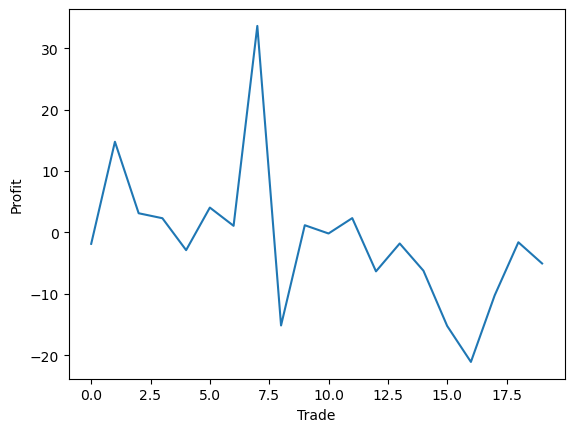

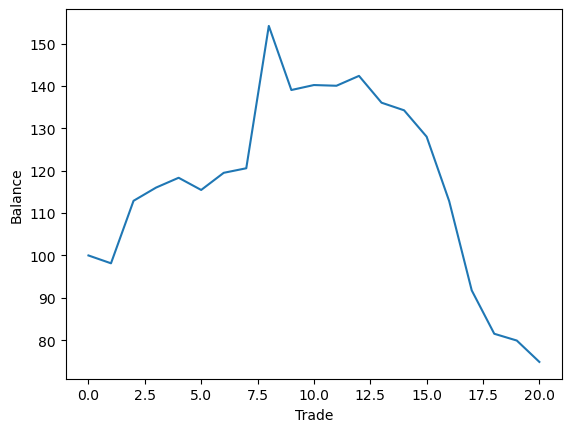

154.21563656405917


In [156]:
import matplotlib.pyplot as plt

balance = 100.00
tokenunit = 0.00
dif = []
dif.append(100)
buy = True
buys =[]
sells = []
count0 = 0
count1 = 0
count2 = 0
sum =0
for i in range(len(df)) :
    X_stream  = df.iloc[[i]]
    X_model = X_stream[features]

    ModelPrediction = loaded_model.predict(X_model)
    #Buy Signal
    if ModelPrediction == 2 and buy == True :
         tokenunit = balance/(df['close'].iloc[i]+ df['close'].iloc[i]*0.0005)
         buys.append([df['time'].iloc[i],df['close'].iloc[i],balance])
         buy = False
         count2 = count2 +1
    # if balance-balance*0.3 > tokenunit*(df['close'].iloc[i] - df['close'].iloc[i]*0.0005) and buy == False:
    #     balance = tokenunit*(df['close'].iloc[i] - df['close'].iloc[i]*0.0005)
    #     sells.append([df['time'].iloc[i],df['close'].iloc[i],balance])
    #     tokenunit=0
    #     sum = sum +1
    #     i+= 34
    #     buy = True
    if ModelPrediction == 1 and buy == False :
        balance = tokenunit*(df['close'].iloc[i] - df['close'].iloc[i]*0.0005)
        dif.append(balance)
        sells.append([df['time'].iloc[i],df['close'].iloc[i],balance])
        tokenunit=0
        sum = sum +1
        buy = True
        count1 = count1 +1
    if ModelPrediction == 0 :
        count0 = count0 +1

print("Số lần mua :",count2,"Số lần bán :",count1,"Số lần giữ :",count0)
win = 0
profit = []
for i in range(len(sells)) :
    profit.append(sells[i][2] - buys[i][2])
    if profit[i] > 0 :
        win = win +1
print("Số dư tài khoản hiện có :",balance)
plt.plot(profit)
plt.ylabel('Profit')
plt.xlabel('Trade')

plt.show()

plt.plot(dif)
plt.ylabel('Balance')
plt.xlabel('Trade')
plt.show()
print(max(dif))

In [157]:
buyedp =[]
buyedt = []
selledp =[]
selledt = []
for i in range(len(buys)) :
    buyedp.append(buys[i][1])
    buyedt.append(buys[i][0])
for i in range(len(sells)) :
    selledp.append(sells[i][1])
    selledt.append(sells[i][0])

import plotly.graph_objects as go
import numpy as np
import plotly.express as px
import pandas as pd
fig = go.Figure(data=[go.Candlestick(x=df1['time'],
                                     open=df1['open'],
                                     high=df1['high'],
                                     low=df1['low'],
                                     close=df1['close'])])
fig.add_trace(go.Scatter(x=buyedt, y=buyedp, mode='markers', marker=dict(color='blue'), name='Mua'))
fig.add_trace(go.Scatter(x=selledt, y=selledp, mode='markers', marker=dict(color='red'), name='Bán'))
fig.update_layout(title='Biểu đồ nến với điểm mua và bán', yaxis_title='Giá')
fig.show()


C:\ProgramData\anaconda3\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

